## The `extent` parameter in `geom_imshow()` 

A list of four numbers: `[left, right, bottom, top]` that
defines the image bounding box
in terms of 'data coordinates'.

In [1]:
import numpy as np
from lets_plot import *

LetsPlot.setup_html()

The default `extent` is derived from the image's array dimentions: `[-0.5, ncol-0.5, -0.5, nrow-0.5]`.


In [2]:
# An 2x2 pix image by default has extent [-0.5, 1.5, -0.5, 1.5]
arr = np.array([
            [[150, 0, 0], [0, 150, 0]],
            [[0, 0, 150], [150, 150, 0]]
        ])

ggplot() + geom_imshow(arr)

## When does image `extent` need to be set explicitly

Let's assume that our image doesn't exist in vacuum but is related to some data, 
and the image' bounding box in the 'data coordinates' is: 

- `(x, y) = (0, -1)`
- `(width, height) = (8, 3)`.

The image `extent` in this case would be: `[0, 8, -1, 3]`.

In [3]:
# Generate demo data.
np.random.seed(42)

cov0=[[1, -.8], 
     [-.8, 1]]     
cov1=[[ 10, .1],
       [.1, .1]]

x0, y0 = np.random.multivariate_normal(mean=[4,0], cov=cov0, size=400).T
x1, y1 = np.random.multivariate_normal(mean=[4,1], cov=cov1, size=400).T

data = dict(
    x = np.concatenate((x0,x1)),
    y = np.concatenate((y0,y1))
)

In [4]:
ggplot(data, aes('x', 'y')) + geom_density2d() + ggsize(620, 300)

Let's show the data and the image on the same plot.

In [5]:
(ggplot(data, aes('x', 'y')) + 
 geom_imshow(arr, extent=[0, 8, -1, 3]) + 
 geom_density2d(color="yellow") + 
 ggsize(620, 300) + 
 flavor_high_contrast_dark())

# 
## Flipping and transposing image using `extent`

In [6]:
# Load image file.
from PIL import Image
import requests
from io import BytesIO

response = requests.get('https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png')

image = Image.open(BytesIO(response.content))
boat_arr = np.asarray(image)
boat_arr.shape


(225, 225, 3)


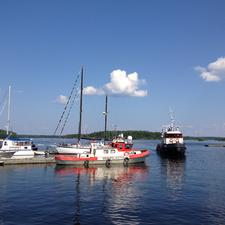

In [7]:
ggplot() + geom_imshow(image_data=boat_arr)


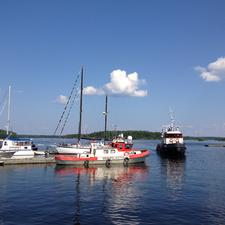
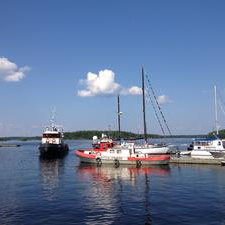
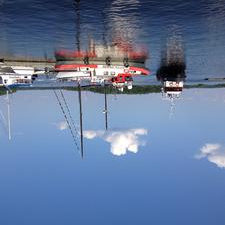
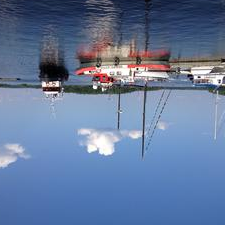

In [8]:
dim = 100

ext_base = [0, dim, 0, dim]
ext_flip_x = [dim, 0, 0, dim]
ext_flip_y = [0, dim, dim, 0]
ext_transpose = [dim, 0, dim, 0]

label_data = dict(
    x = [50, 150, 150, 50],
    y = [200, 200, 0, 0],
    label = ["original", "flip columns", "flip rows", "transpose"]
)

(ggplot() + 
     geom_imshow(
         boat_arr, 
         extent=[v + dim if i in (2, 3) else v for i, v in enumerate(ext_base)]
     ) + 
     geom_imshow(
         boat_arr, 
         extent=[v + dim for v in ext_flip_x]
     ) + 
     geom_imshow(
         boat_arr, 
         extent=[v + dim if i in (0, 1) else v for i, v in enumerate(ext_flip_y)]
     ) + 
     geom_imshow(
         boat_arr, 
         extent=ext_transpose
     ) + 
     geom_hline(yintercept=100, color="yellow", tooltips="none") + 
     geom_vline(xintercept=100, color="yellow", tooltips="none") + 
     geom_label(aes("x", "y", label="label"), data=label_data) +
     ggsize(700, 700)
)